# IMPORTS

In [2]:
import pandas as pd
import numpy as np



# Loading our datasets into data frames

In [9]:

clubs = pd.read_csv("DataSets/clubs.csv")
players = pd.read_csv("DataSets/players.csv")
comps = pd.read_csv('DataSets/competitions.csv')



# dropping nulls and removing completely empty columns

In [10]:
#players = players.na.drop()
columns_to_drop_from_clubs = ["coach_name", "total_market_value","filename","url"] # 100% missing
columns_to_drop_from_players = ["agent_name", "contract_expiration_date","first_name","last_name","image_url","url","current_club_domestic_competition_id","city_of_birth"] # uneccessary data with many nulls
columns_to_Drop_from_PV = ["datetime"]
columns_to_drop_from_comps = ["confederation","url","country_id"]

clubs = clubs.drop(columns = columns_to_drop_from_clubs)
players= players.drop(columns  = columns_to_drop_from_players)
comps = comps.drop(columns=columns_to_drop_from_comps)

players = players.dropna()
clubs = clubs.dropna()
comps =comps.dropna()
# player values has no nulls so no need to change anything



In [12]:
print("clubs",clubs.columns)
print("player",players.columns)
print("comps",comps.columns)

clubs Index(['club_id', 'club_code', 'name', 'domestic_competition_id', 'squad_size',
       'average_age', 'foreigners_number', 'foreigners_percentage',
       'national_team_players', 'stadium_name', 'stadium_seats',
       'net_transfer_record', 'last_season'],
      dtype='object')
player Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm', 'current_club_name',
       'market_value_in_eur', 'highest_market_value_in_eur'],
      dtype='object')
comps Index(['competition_id', 'competition_code', 'name', 'sub_type', 'type',
       'country_name', 'domestic_league_code'],
      dtype='object')


# Performing the merge between the datasets

In [13]:
merged_df = pd.merge(clubs, players, left_on='club_id', right_on='current_club_id', how='inner')
print(merged_df.duplicated().sum())
merged_df = pd.merge(merged_df, comps, left_on='domestic_competition_id',right_on='competition_id', how='inner')
print(merged_df.duplicated().sum())









0
0


In [23]:
merged_df.shape

(23129, 35)

# Saving joined data into new file 

In [24]:
merged_df.to_csv("DataSets/integratedDataSet.csv", index=False)



In [14]:
df= pd.read_csv('DataSets/integratedDataSet.csv')

In [15]:
df = df.dropna()

# Abdallah's Questions !!

## Reseacrh question 1: which competitions have the most valuable players by age

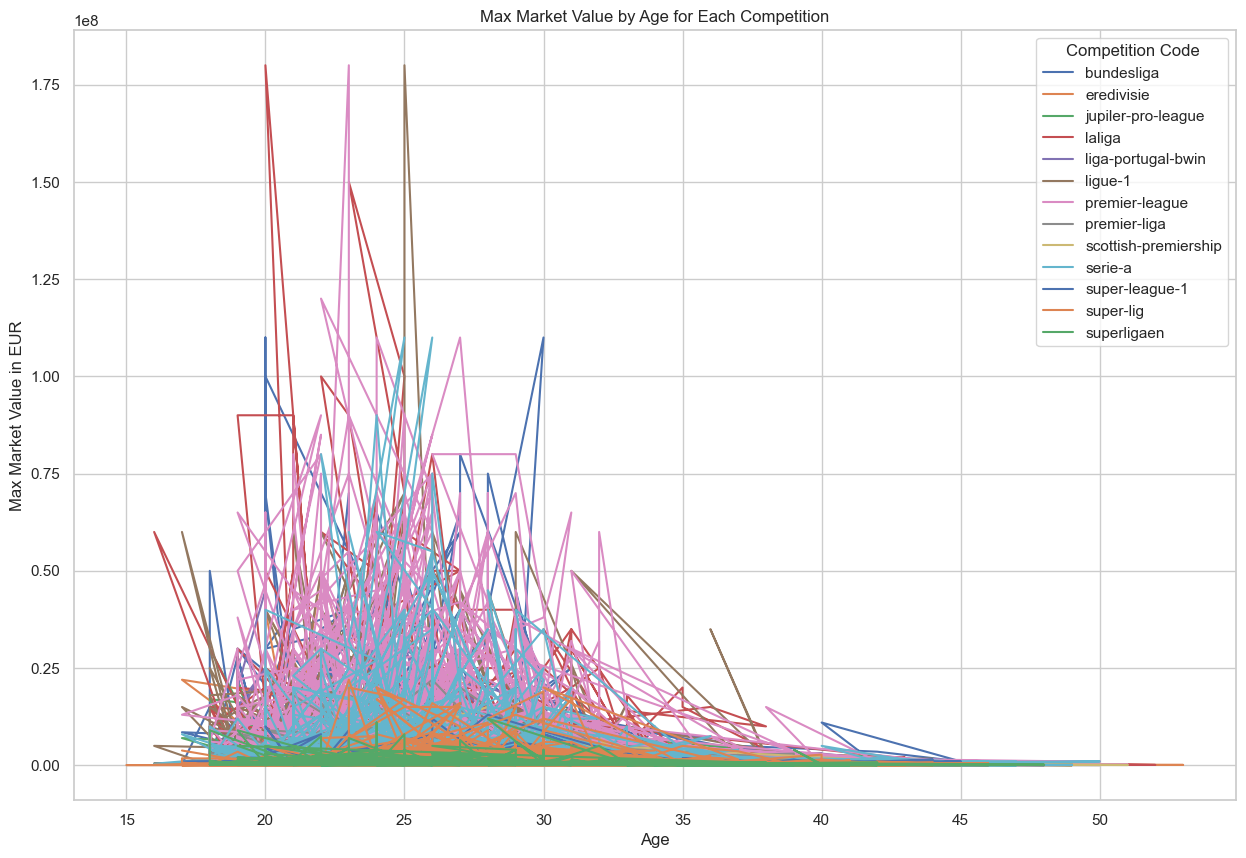

In [53]:
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'date_of_birth' to datetime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# Calculate age based on today's date
today = pd.to_datetime('today')
df['age'] = (today - df['date_of_birth']).dt.days // 365  
max_values = df.groupby('competition_code')['market_value_in_eur'].max()

plt.figure(figsize=(15, 10))

for competition_code, values in max_values.items():
    # Filter the DataFrame for each competition_code
    competition_df = df[df['competition_code'] == competition_code]
    
    plt.plot(competition_df['age'], competition_df['market_value_in_eur'], label=competition_code)

plt.title('Max Market Value by Age for Each Competition')
plt.xlabel('Age')
plt.ylabel('Max Market Value in EUR')
plt.legend(title='Competition Code')
plt.grid(True)
plt.show()

#### as we can see from the grid 4 leagues dominate the most valuable players through ages and they are 'laliga', 'premier league', 'ligue 1' , 'bundesliga'. The serie a is the closest league to those 4 which makes sense considering those 5 leagues are considered europe's 'top 5' leagues. there are 3 players that stand out being a lot more expensive than the rest, 1 of them is aged 20 and plays in laliga one is aged 23 and plays in the premier league and the last is 25 and plays in ligue 1. Also, we can clearly see that around 20-25 years old players tend to be at their most valuable. 

## Research question 2 : do leagues value different positions differently?

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by 'competition_code' and 'position', calculate mean market value
mean_values = df.groupby(['competition_code', 'position'])['market_value_in_eur'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Create unique positions for x-axis ticks
positions = mean_values['position'].unique()

# Plot a bar for each position within each competition code
for i, position in enumerate(positions):
    position_data = mean_values[mean_values['position'] == position]
    competition_codes = position_data['competition_code'].astype(str)
    plt.bar(position_data['competition_code'] + i * 0.2, position_data['market_value_in_eur'],
            width=0.2, label=position)

plt.title('Mean Market Value by Position for Each Competition')
plt.xlabel('Competition Code')
plt.ylabel('Mean Market Value in EUR')
plt.legend(title='Position', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


TypeError: can only concatenate str (not "float") to str

<Figure size 1200x600 with 0 Axes>

# Shehata's questions!!!

Question 1 : 